Accuracy Entropy :  79.61956521739131
Report Entropy : 
                            precision    recall  f1-score   support

Healthcare Representative       0.00      0.00      0.00        25
          Human Resources       0.44      1.00      0.61        14
    Laboratory Technician       1.00      1.00      1.00        67
                  Manager       0.00      0.00      0.00        33
   Manufacturing Director       0.39      1.00      0.56        36
        Research Director       0.00      0.00      0.00        17
       Research Scientist       1.00      1.00      1.00        66
          Sales Executive       1.00      1.00      1.00        86
     Sales Representative       1.00      1.00      1.00        24

                 accuracy                           0.80       368
                macro avg       0.54      0.67      0.57       368
             weighted avg       0.71      0.80      0.74       368



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


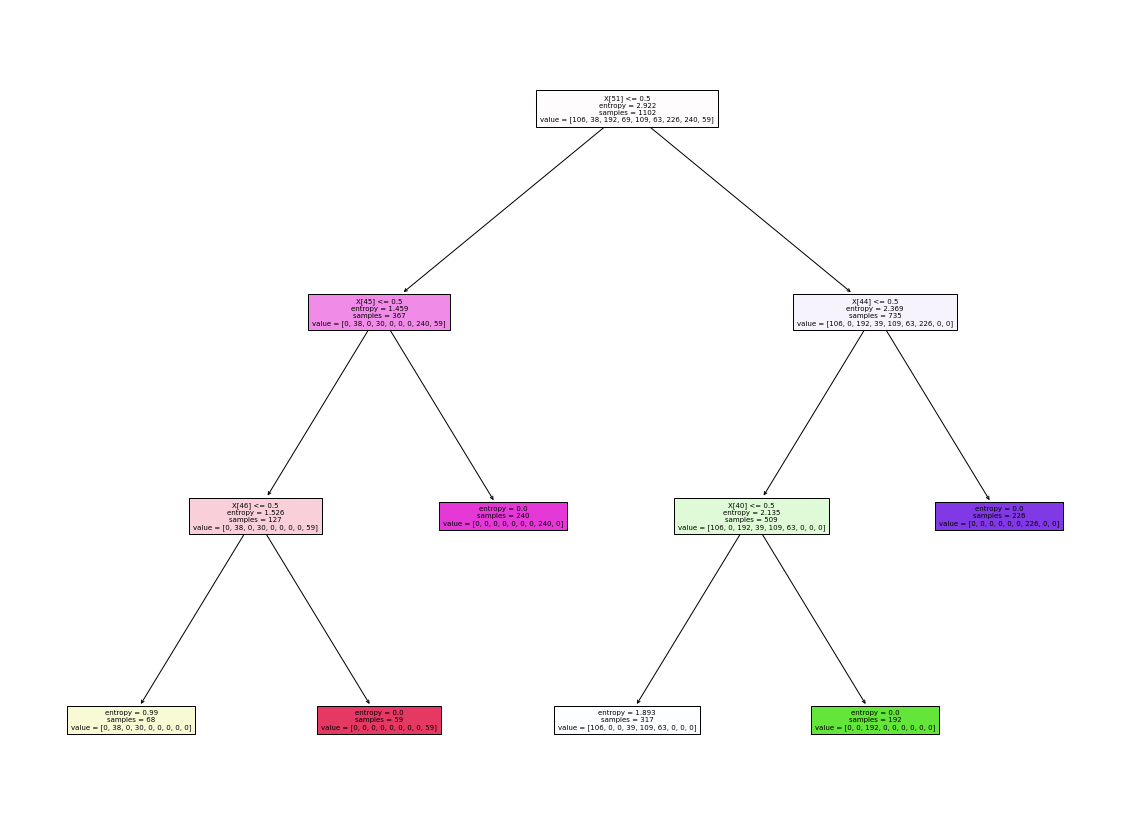

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def compute_the_decision_trees() :

    data = pd.read_csv('../input/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv')
    plt.rcParams['figure.figsize'] = (20.0,15.0)
    data.isnull().sum()

    maritalStatus = pd.get_dummies(data['MaritalStatus'])
    over18 = pd.get_dummies(data['Over18'], '18')
    gender = pd.get_dummies(data['Gender'], 'sex')
    educ = pd.get_dummies(data['EducationField'], 'field')
    role = pd.get_dummies(data['JobRole'], 'role')
    travel = pd.get_dummies(data['BusinessTravel'], 'travel')
    department = pd.get_dummies(data['Department'], 'dept')
    
    data = pd.concat([data, maritalStatus, over18, gender, educ, role, travel, department], axis=1)
   

    X = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
             'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
             'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
             'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Divorced',
             'Married', 'Single', '18_Y', 'sex_Female', 'sex_Male',
             'field_Human Resources', 'field_Life Sciences', 'field_Marketing',
             'field_Medical', 'field_Other', 'field_Technical Degree',
             'role_Healthcare Representative', 'role_Human Resources',
             'role_Laboratory Technician', 'role_Manager',
             'role_Manufacturing Director', 'role_Research Director',
             'role_Research Scientist', 'role_Sales Executive',
             'role_Sales Representative', 'travel_Non-Travel',
             'travel_Travel_Frequently', 'travel_Travel_Rarely',
             'dept_Human Resources', 'dept_Research & Development', 
             'dept_Sales']]
    y = data['JobRole']


    # impartim dataset in train si test
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # arborele de decizie cu criteriul entropy
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                         max_depth=3, min_samples_leaf=5)
    # efectuarea training-ului
    clf_entropy.fit(X_train, y_train)

    # prezicerea cu entropy
    y_pred_entropy = clf_entropy.predict(X_test)

    print("Accuracy Entropy : ", accuracy_score(y_test, y_pred_entropy) * 100)
    print("Report Entropy : \n", classification_report(y_test, y_pred_entropy))

    plt.scatter(y_pred_entropy, y_test, alpha=.8, color='y')
    tree.plot_tree(clf_entropy, filled=True, fontsize=7)
    plt.show()


if __name__ == '__main__' :
    compute_the_decision_trees()

